In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Plots for experiment 1 with synthetic data.

In [ ]:
from IPython import display
import pandas as pd
import numpy as np
import scipy
import scipy.stats

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from tensorflow import keras

from tensorflow.keras import layers
import tensorflow_probability as tfp
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import pickle
from timeit import default_timer as timer

In [ ]:
tfd = tfp.distributions
tfb = tfp.bijectors

a1=300 #Number of genes
a2=[5,10,25,50,100,200,400,800,1600] #Number of cells
Folder = '/content/drive/MyDrive/'

In [ ]:
#Aggregate posterior correlations samples from different experiments.
lb_cor_tick=[]
lb_cor = []
xx_cor = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Cells/Beta/cor_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Cells/Beta/nuts_cor_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)
      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-3]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lb_cor.append(str(a2[ii]))
      lb_cor_tick.append(ii+1)
      xx_cor.append(globals()['x'+str(ii)])

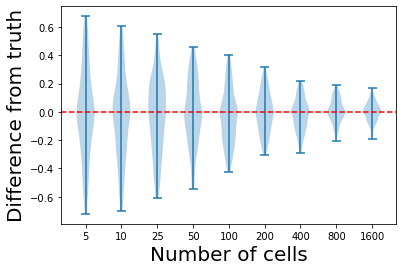

In [ ]:
#Plot posterior correlation violin plots.
plt.violinplot(xx_cor)
plt.xticks(lb_cor_tick,lb_cor)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Number of cells',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Cells/Beta/Cells_Beta_exp_cor.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#Aggregate posterior methylation mean samples from different experiments.
lb_m_met_tick=[]
lb_m_met = []
xx_m_met = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Cells/Beta/mm_met_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Cells/Beta/nuts_m_met_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)
      
      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      ss1 = ss[2]
      ss2 = ss[-3]
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1

      lb_m_met.append(str(a2[ii]))
      lb_m_met_tick.append(ii+1)
      xx_m_met.append(globals()['x'+str(ii)])

In [ ]:
#Aggregate posterior expression mean samples from different experiments.
lb_m_exp_tick=[]
lb_m_exp = []
xx_m_exp = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Cells/Beta/mm_exp_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Cells/Beta/nuts_m_exp_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)

      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lb_m_exp.append(str(a2[ii]))
      lb_m_exp_tick.append(ii+1)
      xx_m_exp.append(globals()['x'+str(ii)])

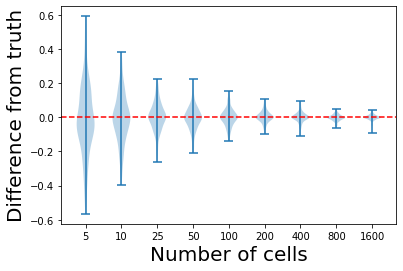

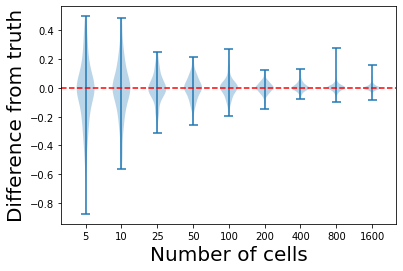

In [ ]:
#Plot posterior methylation and expression mean violin plots.
plt.violinplot(xx_m_met)
plt.xticks(lb_m_met_tick,lb_m_met)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Number of cells',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Cells/Beta/Cells_Beta_exp_lt_met_mn.pdf', bbox_inches='tight')
plt.show()

plt.violinplot(xx_m_exp)
plt.xticks(lb_m_exp_tick,lb_m_exp)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Number of cells',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Cells/Beta/Cells_Beta_exp_lt_exp_mn.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#Aggregate posterior methylation standard deviation samples from different experiments.
lb_s_met_tick=[]
lb_s_met = []
xx_s_met = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Cells/Beta/ss_met_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Cells/Beta/nuts_s_met_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)

      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      ss1 = ss[1]
      ss2 = ss[-2]
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lb_s_met.append(str(a2[ii]))
      lb_s_met_tick.append(ii+1)
      xx_s_met.append(globals()['x'+str(ii)])

In [ ]:
#Aggregate posterior expression standard deviation samples from different experiments.
lb_s_exp_tick=[]
lb_s_exp = []
xx_s_exp = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Cells/Beta/ss_exp_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Cells/Beta/nuts_s_exp_'+str(a1)+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)

      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      tt1 = tf.where(tf.less_equal(tt, ss[2]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lb_s_exp.append(str(a2[ii]))
      lb_s_exp_tick.append(ii+1)
      xx_s_exp.append(globals()['x'+str(ii)])

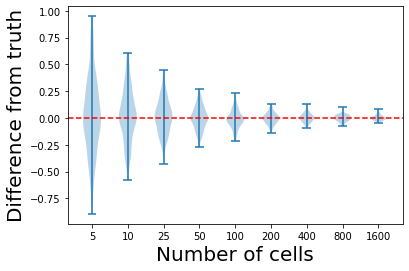

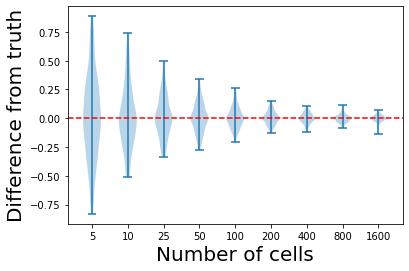

In [ ]:
#Plot posterior methylation and expression standard deviation violin plots.
plt.violinplot(xx_s_met)
plt.xticks(lb_s_met_tick,lb_s_met)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Number of cells',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Cells/Beta/Cells_Beta_exp_lt_met_sig.pdf', bbox_inches='tight')
plt.show()
plt.violinplot(xx_s_exp)
plt.xticks(lb_s_exp_tick,lb_s_exp)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Number of cells',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Cells/Beta/Cells_Beta_exp_lt_exp_sig.pdf', bbox_inches='tight')
plt.show()